# Data Mining Clinal Healthcare Data to Predict Heart Failure

### Context

Cardiovascular diseases (CVD's) are the number one cause of death globally taking an estimated 17.9 million lives each year. Four out of five CVD deaths can be attributed to heart attacks and strokes, with one-third of these deaths occur prematurely in individuals under 70 years old. Given that heart failure is known to correlate with common clinical features collected during routine check-ups, machine learning offers a cost-efficient way to screen individuals do determine if their relative risk level.

Authors:
- Gary Bair
- George Garcia
- Luis Perez

### Package Requirements

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn
import xgboost as xgb
import graphviz
import os
import random
import imblearn
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
import multiprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score, roc_curve, roc_auc_score, confusion_matrix
from scipy.stats import loguniform

# Data Importing and Pre-processing

## Dataset Description

This dataset was created by combining datasets already available independently but not previously combined in the UCI Machine Learning Repository. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

- Cleveland: 303 observations
- Hungarian: 294 observations
- Switzerland: 123 observations
- Long Beach VA: 200 observations
- Stalog (Heart) Data Set: 270 observations

Total: 1190 observations <br />
Duplicated: 272 observations <br />

Final dataset: 918 observations <br />

Origin: Kaggle <br />
File Type: CSV <br />
File Size: 35.1 kB <br />
Modeling Problem: Classification <br />
Missing Values: No <br />

The individual datasets used to construct the dataset used in this analysis can be referenced using the index of heart disease datasets from UCI Machine Learning Repository which can be found at the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

## Attribute Information:
1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]


### Read Dataset and Display Info, 

In [2]:
df= pd.read_csv('heart.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [3]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

### Display Columns

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Dataframe Dimensions

In [5]:
df.shape

(918, 12)

### Missing Data

In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

We observe that there are no missing values in this dataset thus data imputation will not be required.

### Data Statistics

In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


We note that all values exist within plausible ranges. Resting BP can be zero in cases of severe hypertension and FastingBS/HeartDisease are binary variables thus are admissible at this stage of analysis.

### Data Transformation

In [8]:
cat_variables = ['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope']
num_variables = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [9]:
cat_dummies = pd.get_dummies(df[cat_variables])

In [10]:
def mm_normalize(df,col_list):
    temp_df = pd.DataFrame()
    for col in col_list:
        temp_df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
    return temp_df

In [11]:
num_normed = mm_normalize(df, num_variables)

In [12]:
processed_df = pd.concat([num_normed, cat_dummies],axis = 1)

In [13]:
processed_df.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,FastingBS,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.70,0.479270,0.788732,0.295455,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0.428571,0.80,0.298507,0.676056,0.409091,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,0.183673,0.65,0.469320,0.267606,0.295455,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,0.408163,0.69,0.354892,0.338028,0.465909,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,0.530612,0.75,0.323383,0.436620,0.295455,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


# Data Analysis and Visualization

## Identifying Variable Types

### Categorical Features:
- Sex: sex of the patient [M: Male, F: Female] <br />
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic] <br />
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise] <br />
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality, LVH: showing probable or definite left ventricular hypertrophy] <br />
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]<br />
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal] <br />

### Numerical Features:
- Age: age of the patient [years]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]


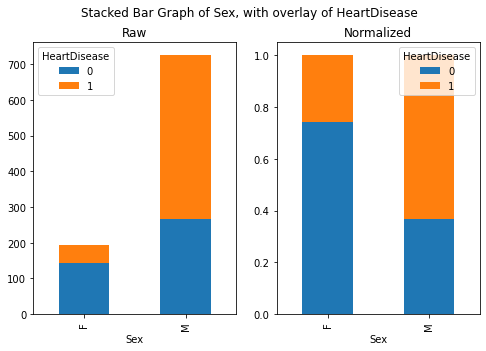

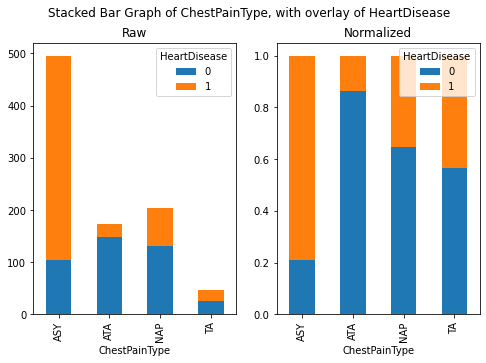

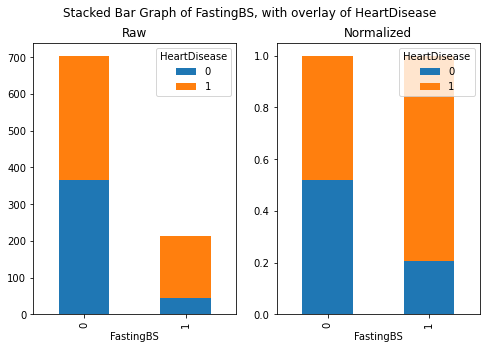

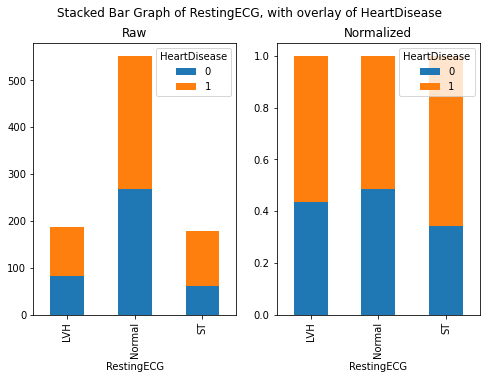

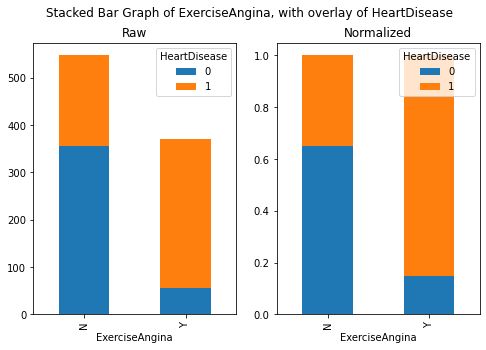

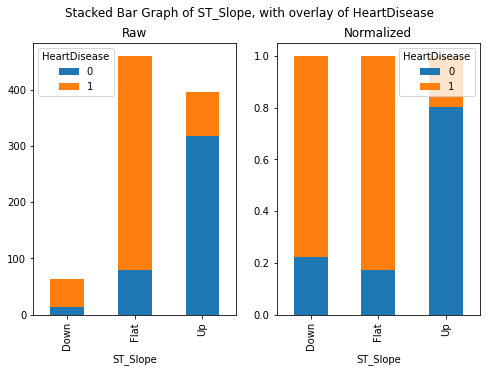

In [14]:
for col in cat_variables:
    crosstab = pd.crosstab(df[col], df['HeartDisease'])
    crosstab_norm = crosstab.div(crosstab.sum(1), axis = 0)
    fig, [ax1, ax2] = plt.subplots(nrows = 1, ncols= 2)
    fig.suptitle('Stacked Bar Graph of {}, with overlay of HeartDisease'.format(col))
    ax1.set_title('Raw')
    crosstab.plot(kind = 'bar', ax = ax1, stacked = True, figsize = (8,5), sort_columns = True)
    ax2.set_title('Normalized')
    crosstab_norm.plot(kind = 'bar', ax = ax2, stacked = True, figsize = (8,5), sort_columns = True)

In [15]:
print('HeartDisease split')
print(df.HeartDisease.value_counts(normalize = True))
print('\n')
for col in cat_variables:
    ct_1 = pd.crosstab(df['HeartDisease'], df[col])
    ct_2 = pd.crosstab(df['HeartDisease'], 
                       df[col],
                       normalize = 'columns')
    print('{} Values'.format(col))
    print(ct_1)
    print('\n')
    print('{} Percentages'.format(col))
    print(ct_2)
    print('\n')

HeartDisease split
1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64


Sex Values
Sex             F    M
HeartDisease          
0             143  267
1              50  458


Sex Percentages
Sex                  F         M
HeartDisease                    
0             0.740933  0.368276
1             0.259067  0.631724


ChestPainType Values
ChestPainType  ASY  ATA  NAP  TA
HeartDisease                    
0              104  149  131  26
1              392   24   72  20


ChestPainType Percentages
ChestPainType       ASY       ATA      NAP        TA
HeartDisease                                        
0              0.209677  0.861272  0.64532  0.565217
1              0.790323  0.138728  0.35468  0.434783


FastingBS Values
FastingBS       0    1
HeartDisease          
0             366   44
1             338  170


FastingBS Percentages
FastingBS            0         1
HeartDisease                    
0             0.519886  0.205607
1             0.480114  0.794393



<ipython-input-16-4b89e19b704e>:13: RuntimeWarning: invalid value encountered in true_divide
  n_norm = np.true_divide(n_table, n_sum)


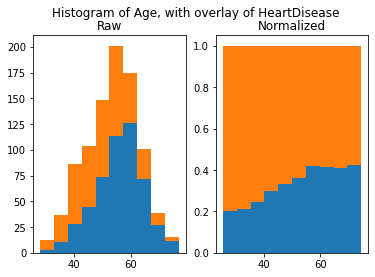

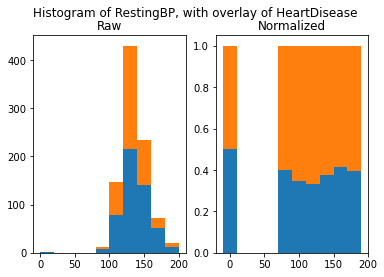

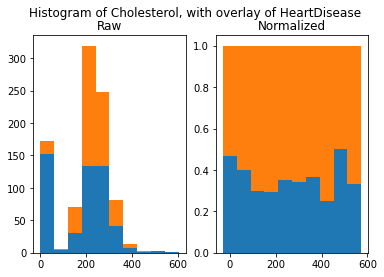

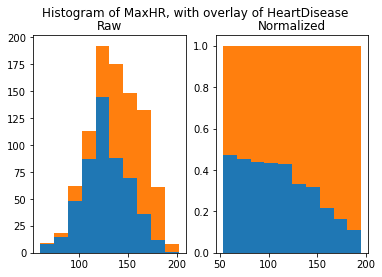

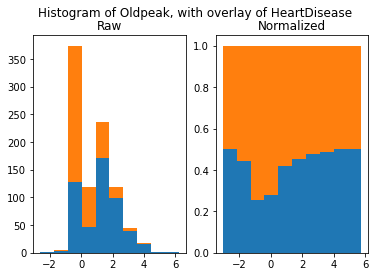

In [16]:
for col in num_variables:
    fig, [ax1, ax2] = plt.subplots(nrows = 1, ncols= 2)
    fig.suptitle('Histogram of {}, with overlay of HeartDisease'.format(col))
    ax1.set_title('Raw')
    ax2.set_title('Normalized')

    y = df[df.HeartDisease == 1][col]
    n = df[df.HeartDisease == 0][col]
    
    n, bins, patches = ax1.hist([y, n], bins = 10, stacked = True)
    n_table = np.column_stack((n[0], n[1]))
    n_sum = n_table.sum(axis=1)[:, None]
    n_norm = np.true_divide(n_table, n_sum)
    ourbins = np.column_stack((bins[0:10], bins[1:11]))
    
    ax2.bar(x = ourbins[:,0], 
       height = n_norm[:,1], 
       width = ourbins[:, 1] - ourbins[:, 0])
    ax2.bar(x = ourbins[:,0], 
       height = n_norm[:,1], 
       width = ourbins[:, 1] - ourbins[:, 0], 
       bottom = n_norm[:,0])

In [17]:
df[num_variables].describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


In [18]:
df[num_variables].skew()

Age           -0.195933
RestingBP      0.179839
Cholesterol   -0.610086
MaxHR         -0.144359
Oldpeak        1.022872
dtype: float64

In [19]:
df.groupby('HeartDisease').mean()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
HeartDisease,,,,,,
0,50.551220,130.180488,227.121951,0.107317,148.151220,0.408049
1,55.899606,134.185039,175.940945,0.334646,127.655512,1.274213


## Bivariate Analysis

In [20]:
corr = df[num_variables].corr()
corr

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
Age,1.000000,0.254399,-0.095282,-0.382045,0.258612
RestingBP,0.254399,1.000000,0.100893,-0.112135,0.164803
Cholesterol,-0.095282,0.100893,1.000000,0.235792,0.050148
MaxHR,-0.382045,-0.112135,0.235792,1.000000,-0.160691
Oldpeak,0.258612,0.164803,0.050148,-0.160691,1.000000


<AxesSubplot:>

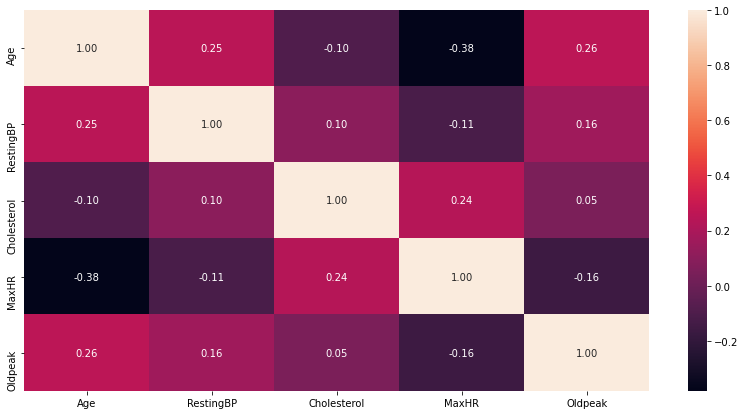

In [21]:
plt.figure(figsize = (14,7))
sns.heatmap(corr, 
            annot = True , 
            fmt = '.2f')

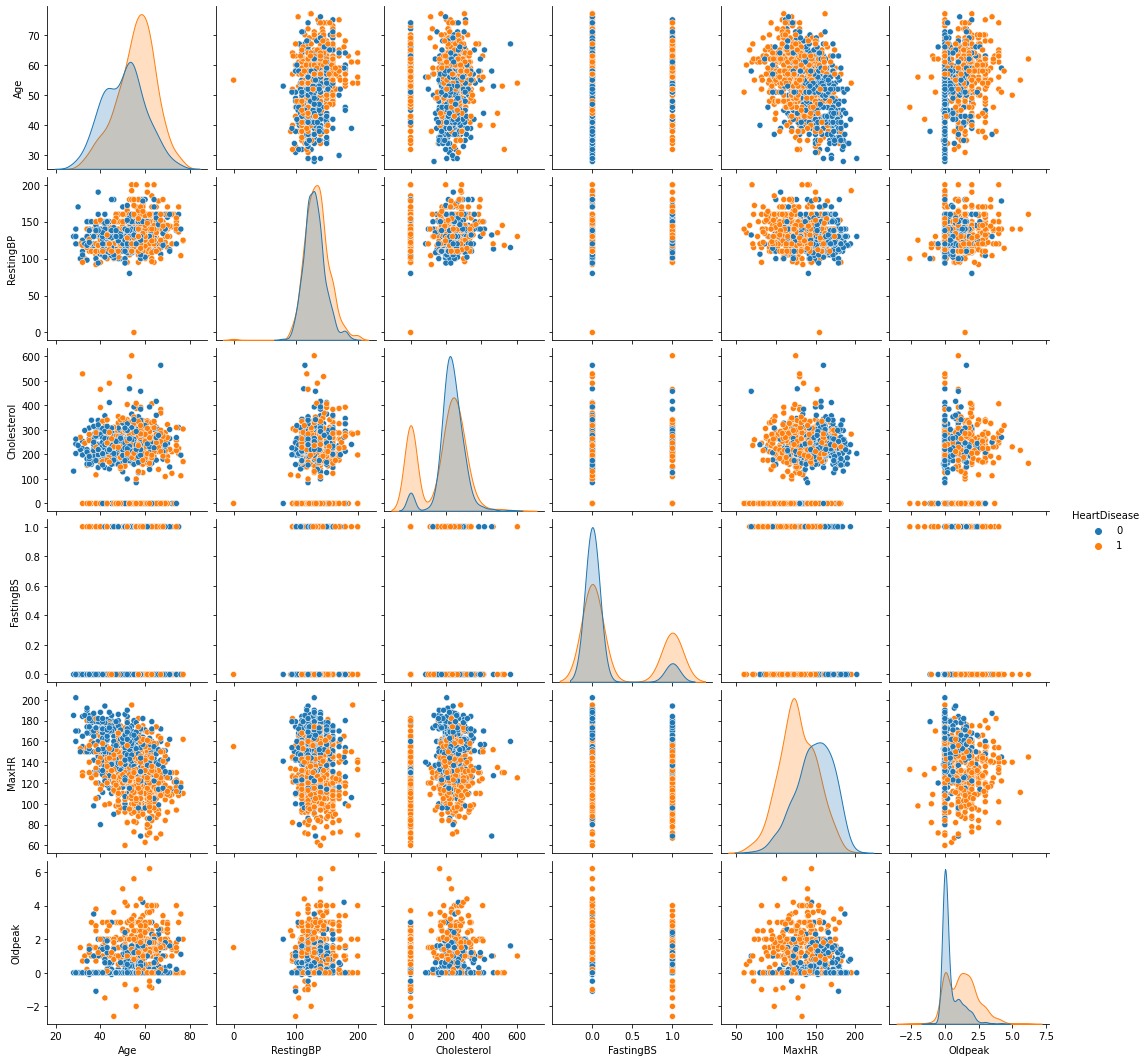

In [22]:
sns.pairplot(df, hue = 'HeartDisease')

# Data Analytics

### Data Partitioning and Balancing

In [23]:
y = df['HeartDisease']
y_names = ['Heart Disease','No Heart Disease']
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [24]:
X = processed_df
X_names =['Age',
          'RestingBP',
          'Cholesterol',
          'MaxHR',
          'Oldpeak',
          'FastingBS',
          'Female', 'Male',
          'ChestPainType_Asymptomatic','ChestPainType_ATA','ChestPainType_TA', 'ChestPainType_NAP',
          'RestingECG_LVH','RestingECG_Normal', 'RestingECG_ST',
          'ExerciseAngina_N','ExerciseAngina_Y',
          'ST_Slope_Down','ST_Slope_Flat','ST_Slope_Up']
X.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,FastingBS,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.70,0.479270,0.788732,0.295455,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0.428571,0.80,0.298507,0.676056,0.409091,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,0.183673,0.65,0.469320,0.267606,0.295455,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,0.408163,0.69,0.354892,0.338028,0.465909,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,0.530612,0.75,0.323383,0.436620,0.295455,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=0)

### Resampling

In [26]:
print('Target Feature Counts')
print(y_train.value_counts())

print('Target Feature Distribution')
print(y_train.value_counts(normalize = True))

Target Feature Counts
1    345
0    297
Name: HeartDisease, dtype: int64
Target Feature Distribution
1    0.537383
0    0.462617
Name: HeartDisease, dtype: float64


The default distribution of HeartDisease is observed to be roughly a 54%/46% split.

In [27]:
over_sampler = SMOTE(k_neighbors=2)
X_train_reb, y_train_reb = over_sampler.fit_resample(X_train, y_train)

print('Target Feature Distribution after Rebalancing')
print(y_train_reb.value_counts(normalize = True))

Target Feature Distribution after Rebalancing
0    0.5
1    0.5
Name: HeartDisease, dtype: float64


The training dataset now has a 50%/50% split. The test dataset is unmodified and will remain as such. Due to how SMOTE operates, we must recast y_train_reb to NumPy array.

## Logistic Regression

### Baseline Model with Scikit-Learn Default Values

Hyperparameters Observed:
1. Norm Penalty(penalty) - l2
2. Inverse of Regularization Strength(C) - 1.0

In [28]:
lr_baseline = LogisticRegression()

lr_baseline.fit(X_train_reb, y_train_reb)

lr_baseline_y_train = lr_baseline.predict(X_train_reb)
lr_baseline_y_test = lr_baseline.predict(X_test)

### Baseline Model Evaluation

In [29]:
ct_lr_train = pd.DataFrame()
ct_lr_train['Train_Actual'] = y_train_reb
ct_lr_train['LR_Baseline_Train'] = lr_baseline_y_train

lr_baseline_confusion_train = pd.crosstab(ct_lr_train['Train_Actual'],
                                          ct_lr_train['LR_Baseline_Train'])
lr_baseline_confusion_train

LR_Baseline_Train,0,1
Train_Actual,,
0,299,46
1,43,302


In [30]:
ct_lr_test = pd.DataFrame()
ct_lr_test['Test_Actual'] = y_test
ct_lr_test['LR_Baseline_Test'] = lr_baseline_y_test

lr_baseline_confusion_test = pd.crosstab(ct_lr_test['Test_Actual'],
                                ct_lr_test['LR_Baseline_Test'])
lr_baseline_confusion_test

LR_Baseline_Test,0,1
Test_Actual,,
0,87,26
1,20,143


In [31]:
data = [accuracy_score(y_train_reb, lr_baseline_y_train, normalize=True), 
        precision_score(y_train_reb, lr_baseline_y_train),
        recall_score(y_train_reb, lr_baseline_y_train),
        fbeta_score(y_train_reb, lr_baseline_y_train, beta=1),
        fbeta_score(y_train_reb, lr_baseline_y_train, beta=2),
        fbeta_score(y_train_reb, lr_baseline_y_train, beta=0.5),
        roc_auc_score(y_train_reb, lr_baseline_y_train)
       ]


test_names = ['Accuracy',
              'Precision',
              'Recall',
              'F1',
              'F2',
              'F0.5',
              'AUC ROC'
             ]

Training_Performance_Table = pd.DataFrame(data, 
                                          index = test_names, 
                                          columns = ['LR_Baseline'])

In [32]:
data = [accuracy_score(y_test, lr_baseline_y_test, normalize=True), 
        precision_score(y_test, lr_baseline_y_test),
        recall_score(y_test, lr_baseline_y_test),
        fbeta_score(y_test, lr_baseline_y_test, beta=1),
        fbeta_score(y_test, lr_baseline_y_test, beta=2),
        fbeta_score(y_test, lr_baseline_y_test, beta=0.5),
        roc_auc_score(y_test, lr_baseline_y_test)
       ]


test_names = ['Accuracy',
              'Precision',
              'Recall',
              'F1',
              'F2',
              'F0.5',
              'AUC ROC'
             ]

Test_Performance_Table = pd.DataFrame(data, 
                                      index = test_names, 
                                      columns = ['LR_Baseline'])

In [33]:
Training_Performance_Table

,LR_Baseline
Accuracy,0.871014
Precision,0.867816
Recall,0.875362
F1,0.871573
F2,0.873843
F0.5,0.869315
AUC ROC,0.871014


In [34]:
Test_Performance_Table

,LR_Baseline
Accuracy,0.833333
Precision,0.846154
Recall,0.877301
F1,0.861446
F2,0.870889
F0.5,0.852205
AUC ROC,0.823606


## V1 Model using GridSearchCV

Hyperparameters Observed:
1. Norm Penalty(penalty) - (none, l1, l2, elasticnet)
2. Inverse of Regularization Strength(C) - (0.001, 0.01, 0.1, 1, 10, 100)
3. Elastic-Net Mixing Parameter(l1_ratio) - (0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1)
4. Random State - 0
5. Solver - SAGA

Notes: 
- Elastic-Net Mixing Parameter is only explored as it is a necessary sub-parameter used in Elastic Net regularization.
- SAGA solver is specified as it supports all norm penalties supported in this library

In [35]:
lr_space = dict()
lr_space['C'] = [0.001,0.01,0.1,1,10,100]
lr_space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
lr_space['l1_ratio'] = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

In [36]:
lr = LogisticRegression(solver = 'saga')
lr_gs = GridSearchCV(lr, 
                     lr_space, 
                     scoring = 'accuracy', 
                     n_jobs = -1)
lr_gs.fit(X_train_reb, y_train_reb)

print('Best Hyperparameters: %s' % lr_gs.best_params_)

Best Score: 0.8753623188405797
Best Hyperparameters: {'C': 0.1, 'l1_ratio': 0.1, 'penalty': 'elasticnet'}


In [37]:
lr_v1_y_train = lr_gs.predict(X_train_reb)
lr_v1_y_test = lr_gs.predict(X_test)

### V1 Model Evaluation

In [38]:
ct_lr_train['LR_V1_Train'] = lr_v1_y_train

lr_v1_confusion_train = pd.crosstab(ct_lr_train['Train_Actual'],
                                    ct_lr_train['LR_V1_Train'])
lr_v1_confusion_train

LR_V1_Train,0,1
Train_Actual,,
0,298,47
1,39,306


In [39]:
ct_lr_test['LR_V1_Test'] = lr_v1_y_test

lr_v1_confusion_test = pd.crosstab(ct_lr_test['Test_Actual'],
                                   ct_lr_test['LR_V1_Test'])
lr_v1_confusion_test

LR_V1_Test,0,1
Test_Actual,,
0,87,26
1,22,141


In [40]:
data = [accuracy_score(y_train_reb, lr_v1_y_train, normalize=True), 
        precision_score(y_train_reb, lr_v1_y_train),
        recall_score(y_train_reb, lr_v1_y_train),
        fbeta_score(y_train_reb, lr_v1_y_train, beta=1),
        fbeta_score(y_train_reb, lr_v1_y_train, beta=2),
        fbeta_score(y_train_reb, lr_v1_y_train, beta=0.5),
        roc_auc_score(y_train_reb, lr_v1_y_train)
       ]

Training_Performance_Table['LR_V1'] = data

In [41]:
data = [accuracy_score(y_test, lr_v1_y_test, normalize=True), 
        precision_score(y_test, lr_v1_y_test),
        recall_score(y_test, lr_v1_y_test),
        fbeta_score(y_test, lr_v1_y_test, beta=1),
        fbeta_score(y_test, lr_v1_y_test, beta=2),
        fbeta_score(y_test, lr_v1_y_test, beta=0.5),
        roc_auc_score(y_test, lr_v1_y_test)
       ]

Test_Performance_Table['LR_V1'] = data

In [42]:
Training_Performance_Table

,LR_Baseline,LR_V1
Accuracy,0.871014,0.875362
Precision,0.867816,0.866856
Recall,0.875362,0.886957
F1,0.871573,0.876791
F2,0.873843,0.882862
F0.5,0.869315,0.870803
AUC ROC,0.871014,0.875362


In [43]:
Test_Performance_Table

,LR_Baseline,LR_V1
Accuracy,0.833333,0.826087
Precision,0.846154,0.844311
Recall,0.877301,0.865031
F1,0.861446,0.854545
F2,0.870889,0.860806
F0.5,0.852205,0.848375
AUC ROC,0.823606,0.817471


Given that the increase in training set accuracy resulted in a decrease in the test set accuracy, it is reasonable to conclude that this is a sign of overfitting and further efforts to tune hyperparamters are unlikely to produce a notable increase in performance.

## V2 Model using Recursive Feature Elimination

For our final model, we aim to increase the models perfomance through dimensionality reduction. Given that the initial model uses the l2 penalty which allows coefficents to go to zero, we can use it as a starting point to determine which variables are least useful to our model.

In [44]:
lr_baseline.coef_

array([[ 0.25057745,  0.75124712, -1.13611851, -0.8450634 ,  1.35712623,
         1.35148936, -0.65733898,  0.65850132,  1.28244687, -0.63017882,
        -0.21447614,  0.31160746,  0.79949878,  0.36483502,  0.1831224 ,
        -0.48522697,  0.51587367,  0.4833892 ,  1.48574218, -1.1688337 ]])

In [45]:
X_train_reb.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'FastingBS',
       'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N',
       'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [46]:
lr_v2_train = X_train_reb[['Age',
                           'RestingBP', 
                           'Cholesterol', 
                           'MaxHR', 
                           'Oldpeak', 
                           'FastingBS',
                           'Sex_F', 
                           'ChestPainType_ASY', 
                           'ExerciseAngina_N', 
                           'ST_Slope_Flat', 'ST_Slope_Up']]

In [47]:
lr_v2_test = X_test[['Age',
                     'RestingBP', 
                     'Cholesterol', 
                     'MaxHR', 
                     'Oldpeak', 
                     'FastingBS',
                     'Sex_F', 
                     'ChestPainType_ASY', 
                     'ExerciseAngina_N', 
                     'ST_Slope_Flat', 'ST_Slope_Up']]

In [48]:
lr_v2 = LogisticRegression()
lr_v2.fit(lr_v2_train, y_train_reb)

lr_v2_y_train = lr_v2.predict(lr_v2_train)
lr_v2_y_test = lr_v2.predict(lr_v2_test)

In [49]:
lr_v2.coef_

array([[ 0.49444742,  0.74356358, -1.05312337, -0.66429787,  1.58692756,
         1.33562735, -1.24689543,  1.55140279, -0.89961865,  1.15772717,
        -1.5487845 ]])

### V2 Model Evaluation

In [50]:
ct_lr_train['LR_V2_Train'] = lr_v2_y_train

lr_v2_confusion_train = pd.crosstab(ct_lr_train['Train_Actual'],
                                    ct_lr_train['LR_V2_Train'])
lr_v2_confusion_train

LR_V2_Train,0,1
Train_Actual,,
0,297,48
1,43,302


In [51]:
ct_lr_test['LR_V2_Test'] = lr_v2_y_test

lr_v2_confusion_test = pd.crosstab(ct_lr_test['Test_Actual'],
                                   ct_lr_test['LR_V2_Test'])
lr_v2_confusion_test

LR_V2_Test,0,1
Test_Actual,,
0,92,21
1,23,140


In [52]:
data = [accuracy_score(y_train_reb, lr_v2_y_train, normalize=True), 
        precision_score(y_train_reb, lr_v2_y_train),
        recall_score(y_train_reb, lr_v2_y_train),
        fbeta_score(y_train_reb, lr_v2_y_train, beta=1),
        fbeta_score(y_train_reb, lr_v2_y_train, beta=2),
        fbeta_score(y_train_reb, lr_v2_y_train, beta=0.5),
        roc_auc_score(y_train_reb, lr_v2_y_train)
       ]

Training_Performance_Table['LR_V2'] = data

In [53]:
data = [accuracy_score(y_test, lr_v2_y_test, normalize=True), 
        precision_score(y_test, lr_v2_y_test),
        recall_score(y_test, lr_v2_y_test),
        fbeta_score(y_test, lr_v2_y_test, beta=1),
        fbeta_score(y_test, lr_v2_y_test, beta=2),
        fbeta_score(y_test, lr_v2_y_test, beta=0.5),
        roc_auc_score(y_test, lr_v2_y_test)
       ]

Test_Performance_Table['LR_V2'] = data

In [54]:
Training_Performance_Table

,LR_Baseline,LR_V1,LR_V2
Accuracy,0.871014,0.875362,0.868116
Precision,0.867816,0.866856,0.862857
Recall,0.875362,0.886957,0.875362
F1,0.871573,0.876791,0.869065
F2,0.873843,0.882862,0.872832
F0.5,0.869315,0.870803,0.865330
AUC ROC,0.871014,0.875362,0.868116


In [55]:
Test_Performance_Table

,LR_Baseline,LR_V1,LR_V2
Accuracy,0.833333,0.826087,0.840580
Precision,0.846154,0.844311,0.869565
Recall,0.877301,0.865031,0.858896
F1,0.861446,0.854545,0.864198
F2,0.870889,0.860806,0.861009
F0.5,0.852205,0.848375,0.867410
AUC ROC,0.823606,0.817471,0.836527


Eliminating roughly have the predictors in the dataset yielded improvements in model accuracy on the test with little to no effect on the training set.

## CART Decision Tree

### Baseline Model with Scikit-Learn Default Values

Hyperparameters Observed:
1. Minimum Number of Samples Required to be at a Leaf Node(C) - 1

In [56]:
cart_baseline = DecisionTreeClassifier()
cart_baseline.fit(X_train_reb, y_train_reb)

cart_baseline_y_train = cart_baseline.predict(X_train_reb)
cart_baseline_y_test = cart_baseline.predict(X_test)

[Text(650.2013358778626, 526.6125000000001, 'ST_Slope_Up <= 0.5\ngini = 0.5\nsamples = 690\nvalue = [345, 345]\nclass = Heart Disease'),
 Text(410.15839694656484, 492.63750000000005, 'MaxHR <= 0.641\ngini = 0.315\nsamples = 373\nvalue = [73, 300]\nclass = No Heart Disease'),
 Text(239.59923664122135, 458.6625, 'Female <= 0.5\ngini = 0.225\nsamples = 310\nvalue = [40, 270]\nclass = No Heart Disease'),
 Text(135.59541984732823, 424.6875, 'RestingBP <= 0.43\ngini = 0.164\nsamples = 267\nvalue = [24, 243]\nclass = No Heart Disease'),
 Text(124.23664122137404, 390.7125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Heart Disease'),
 Text(146.95419847328245, 390.7125, 'ChestPainType_ATA <= 0.5\ngini = 0.158\nsamples = 266\nvalue = [23, 243]\nclass = No Heart Disease'),
 Text(86.61068702290076, 356.7375, 'Oldpeak <= 0.301\ngini = 0.134\nsamples = 249\nvalue = [18, 231]\nclass = No Heart Disease'),
 Text(75.25190839694656, 322.76250000000005, 'gini = 0.0\nsamples = 49\nvalue = [0, 49]\ncla

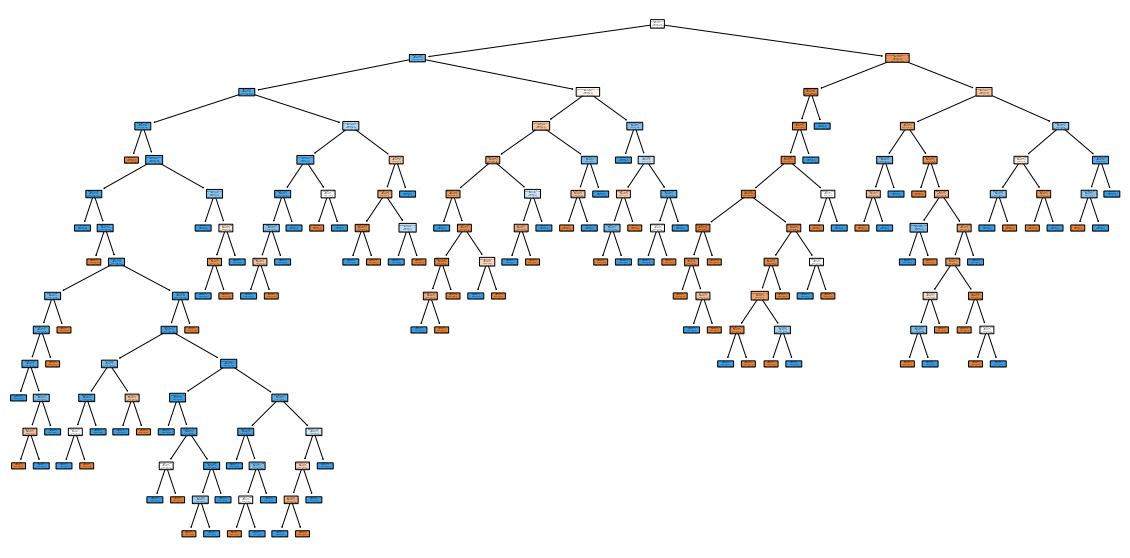

In [57]:
plt.figure(figsize=(20,10))
tree.plot_tree(cart_baseline, 
               filled = True,
               rounded =True, 
               class_names = y_names,
               feature_names = X_names)

### Baseline Model Evaluation

In [58]:
ct_cart_train = pd.DataFrame()
ct_cart_train['Train_Actual'] = y_train_reb
ct_cart_train['CART_Baseline_Train'] = cart_baseline_y_train

cart_baseline_confusion_train = pd.crosstab(ct_cart_train['Train_Actual'],
                                          ct_cart_train['CART_Baseline_Train'])
cart_baseline_confusion_train

CART_Baseline_Train,0,1
Train_Actual,,
0,345,0
1,0,345


In [59]:
ct_cart_test = pd.DataFrame()
ct_cart_test['Test_Actual'] = y_test
ct_cart_test['CART_Baseline_Test'] = cart_baseline_y_test

cart_baseline_confusion_test = pd.crosstab(ct_cart_test['Test_Actual'],
                                           ct_cart_test['CART_Baseline_Test'])
cart_baseline_confusion_test

CART_Baseline_Test,0,1
Test_Actual,,
0,88,25
1,29,134


In [60]:
data = [accuracy_score(y_train_reb, cart_baseline_y_train, normalize=True), 
        precision_score(y_train_reb, cart_baseline_y_train),
        recall_score(y_train_reb, cart_baseline_y_train),
        fbeta_score(y_train_reb, cart_baseline_y_train, beta=1),
        fbeta_score(y_train_reb, cart_baseline_y_train, beta=2),
        fbeta_score(y_train_reb, cart_baseline_y_train, beta=0.5),
        roc_auc_score(y_train_reb, cart_baseline_y_train)
       ]

Training_Performance_Table['CART_Baseline'] = data

In [61]:
data = [accuracy_score(y_test, cart_baseline_y_test, normalize=True), 
        precision_score(y_test, cart_baseline_y_test),
        recall_score(y_test, cart_baseline_y_test),
        fbeta_score(y_test, cart_baseline_y_test, beta=1),
        fbeta_score(y_test, cart_baseline_y_test, beta=2),
        fbeta_score(y_test, cart_baseline_y_test, beta=0.5),
        roc_auc_score(y_test, cart_baseline_y_test)
       ]

Test_Performance_Table['CART_Baseline'] = data

In [62]:
Training_Performance_Table

,LR_Baseline,LR_V1,LR_V2,CART_Baseline
Accuracy,0.871014,0.875362,0.868116,1.0
Precision,0.867816,0.866856,0.862857,1.0
Recall,0.875362,0.886957,0.875362,1.0
F1,0.871573,0.876791,0.869065,1.0
F2,0.873843,0.882862,0.872832,1.0
F0.5,0.869315,0.870803,0.865330,1.0
AUC ROC,0.871014,0.875362,0.868116,1.0


In [63]:
Test_Performance_Table

,LR_Baseline,LR_V1,LR_V2,CART_Baseline
Accuracy,0.833333,0.826087,0.840580,0.804348
Precision,0.846154,0.844311,0.869565,0.842767
Recall,0.877301,0.865031,0.858896,0.822086
F1,0.861446,0.854545,0.864198,0.832298
F2,0.870889,0.860806,0.861009,0.826141
F0.5,0.852205,0.848375,0.867410,0.838548
AUC ROC,0.823606,0.817471,0.836527,0.800423


Inspection of the performance metrics of the baseline model indicates that, unsurprisingly, the model has significant overfitting. Minimizing this is the goal of the following model.

### V1 Model

Hyperparameters of Interest:
1. Maximum Depth of the Tree(max_depth) - 4

In [137]:
cart_v1 = DecisionTreeClassifier(max_depth = 4)

cart_v1.fit(X_train_reb, y_train_reb)

cart_v1_y_train = cart_v1.predict(X_train_reb)
cart_v1_y_test = cart_v1.predict(X_test)

[Text(587.8928571428571, 489.24, 'ST_Slope_Up <= 0.5\ngini = 0.5\nsamples = 690\nvalue = [345, 345]\nclass = Heart Disease'),
 Text(318.85714285714283, 380.52000000000004, 'MaxHR <= 0.641\ngini = 0.315\nsamples = 373\nvalue = [73, 300]\nclass = No Heart Disease'),
 Text(159.42857142857142, 271.8, 'Female <= 0.5\ngini = 0.225\nsamples = 310\nvalue = [40, 270]\nclass = No Heart Disease'),
 Text(79.71428571428571, 163.08000000000004, 'RestingBP <= 0.43\ngini = 0.164\nsamples = 267\nvalue = [24, 243]\nclass = No Heart Disease'),
 Text(39.857142857142854, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Heart Disease'),
 Text(119.57142857142856, 54.360000000000014, 'gini = 0.158\nsamples = 266\nvalue = [23, 243]\nclass = No Heart Disease'),
 Text(239.1428571428571, 163.08000000000004, 'ExerciseAngina_Y <= 0.5\ngini = 0.467\nsamples = 43\nvalue = [16, 27]\nclass = No Heart Disease'),
 Text(199.28571428571428, 54.360000000000014, 'gini = 0.455\nsamples = 20\nvalue = [13, 

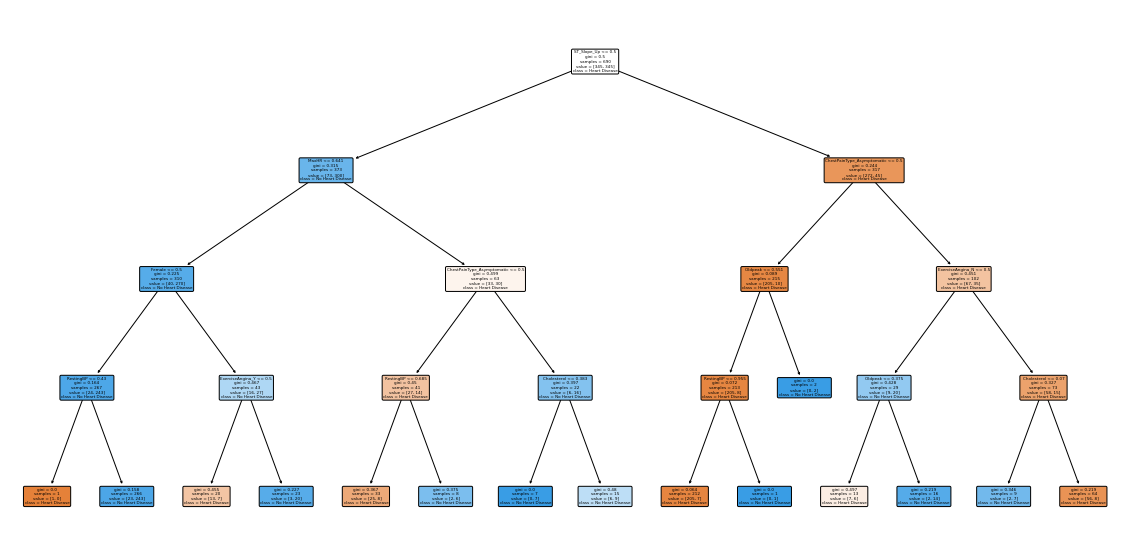

In [138]:
plt.figure(figsize=(20,10))
tree.plot_tree(cart_v1, 
               filled = True,
               rounded =True, 
               class_names = y_names,
               feature_names = X_names)

### V1 Model Evaluation

In [139]:
ct_cart_train['CART_V1_Train'] = cart_v1_y_train

cart_v1_confusion_train = pd.crosstab(ct_cart_train['Train_Actual'],
                                      ct_cart_train['CART_V1_Train'])
cart_v1_confusion_train

CART_V1_Train,0,1
Train_Actual,,
0,307,38
1,36,309


In [140]:
ct_cart_test['CART_V1_Test'] = cart_v1_y_test

cart_v1_confusion_test = pd.crosstab(ct_cart_test['Test_Actual'],
                                     ct_cart_test['CART_V1_Test'])
cart_v1_confusion_test

CART_V1_Test,0,1
Test_Actual,,
0,92,21
1,23,140


In [141]:
data = [accuracy_score(y_train_reb, cart_v1_y_train, normalize=True), 
        precision_score(y_train_reb, cart_v1_y_train),
        recall_score(y_train_reb, cart_v1_y_train),
        fbeta_score(y_train_reb, cart_v1_y_train, beta=1),
        fbeta_score(y_train_reb, cart_v1_y_train, beta=2),
        fbeta_score(y_train_reb, cart_v1_y_train, beta=0.5),
        roc_auc_score(y_train_reb, cart_v1_y_train)
       ]

Training_Performance_Table['CART_V1'] = data

In [142]:
data = [accuracy_score(y_test, cart_v1_y_test, normalize=True), 
        precision_score(y_test, cart_v1_y_test),
        recall_score(y_test, cart_v1_y_test),
        fbeta_score(y_test, cart_v1_y_test, beta=1),
        fbeta_score(y_test, cart_v1_y_test, beta=2),
        fbeta_score(y_test, cart_v1_y_test, beta=0.5),
        roc_auc_score(y_test, cart_v1_y_test)
       ]

Test_Performance_Table['CART_V1'] = data

In [143]:
Training_Performance_Table

,LR_Baseline,LR_V1,LR_V2,CART_Baseline,CART_V1,CART_V2,XGB_Baseline,XGB_V1,NN_Baseline,NN_V1
Accuracy,0.871014,0.875362,0.868116,1.0,0.892754,0.892754,1.0,0.924638,0.955072,0.881159
Precision,0.867816,0.866856,0.862857,1.0,0.890490,0.890490,1.0,0.915014,0.946023,0.854447
Recall,0.875362,0.886957,0.875362,1.0,0.895652,0.895652,1.0,0.936232,0.965217,0.918841
F1,0.871573,0.876791,0.869065,1.0,0.893064,0.893064,1.0,0.925501,0.955524,0.885475
F2,0.873843,0.882862,0.872832,1.0,0.894615,0.894615,1.0,0.931910,0.961316,0.905197
F0.5,0.869315,0.870803,0.865330,1.0,0.891518,0.891518,1.0,0.919180,0.949800,0.866594
AUC ROC,0.871014,0.875362,0.868116,1.0,0.892754,0.892754,1.0,0.924638,0.955072,0.881159


In [144]:
Test_Performance_Table

,LR_Baseline,LR_V1,LR_V2,CART_Baseline,CART_V1,CART_V2,XGB_Baseline,XGB_V1,NN_Baseline,NN_V1
Accuracy,0.833333,0.826087,0.840580,0.804348,0.840580,0.840580,0.858696,0.858696,0.851449,0.829710
Precision,0.846154,0.844311,0.869565,0.842767,0.869565,0.869565,0.873494,0.878049,0.881250,0.833333
Recall,0.877301,0.865031,0.858896,0.822086,0.858896,0.858896,0.889571,0.883436,0.865031,0.889571
F1,0.861446,0.854545,0.864198,0.832298,0.864198,0.864198,0.881459,0.880734,0.873065,0.860534
F2,0.870889,0.860806,0.861009,0.826141,0.861009,0.861009,0.886308,0.882353,0.868227,0.877724
F0.5,0.852205,0.848375,0.867410,0.838548,0.867410,0.867410,0.876663,0.879121,0.877958,0.844005
AUC ROC,0.823606,0.817471,0.836527,0.800423,0.836527,0.836527,0.851865,0.853222,0.848445,0.816467


Inspecting the performance metrics indicates the effort to reduce overfitting was successful and there is likely further room to improve the model.

### V2 Model

Hyperparameters of Interest:
1. Maximimum Depth - 5

In [228]:
cart_v2 = DecisionTreeClassifier(min_impurity_decrease = .004)

cart_v2.fit(X_train_reb, y_train_reb)

cart_v2_y_train = cart_v2.predict(X_train_reb)
cart_v2_y_test = cart_v2.predict(X_test)

### V2 Model Evaluation

[Text(558.0, 498.3, 'ST_Slope_Up <= 0.5\ngini = 0.5\nsamples = 690\nvalue = [345, 345]\nclass = Heart Disease'),
 Text(293.6842105263158, 407.70000000000005, 'MaxHR <= 0.641\ngini = 0.315\nsamples = 373\nvalue = [73, 300]\nclass = No Heart Disease'),
 Text(117.47368421052632, 317.1, 'Female <= 0.5\ngini = 0.225\nsamples = 310\nvalue = [40, 270]\nclass = No Heart Disease'),
 Text(58.73684210526316, 226.5, 'gini = 0.164\nsamples = 267\nvalue = [24, 243]\nclass = No Heart Disease'),
 Text(176.21052631578948, 226.5, 'ExerciseAngina_Y <= 0.5\ngini = 0.467\nsamples = 43\nvalue = [16, 27]\nclass = No Heart Disease'),
 Text(117.47368421052632, 135.89999999999998, 'Cholesterol <= 0.124\ngini = 0.455\nsamples = 20\nvalue = [13, 7]\nclass = Heart Disease'),
 Text(58.73684210526316, 45.299999999999955, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = No Heart Disease'),
 Text(176.21052631578948, 45.299999999999955, 'gini = 0.36\nsamples = 17\nvalue = [13, 4]\nclass = Heart Disease'),
 Text(234.94

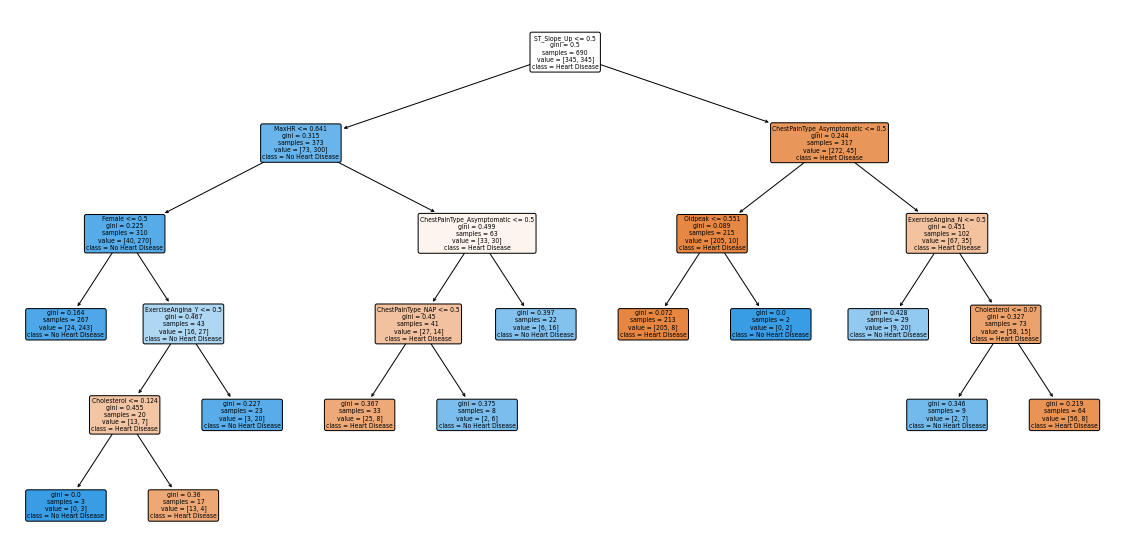

In [229]:
plt.figure(figsize=(20,10))
tree.plot_tree(cart_v2, 
               filled = True,
               rounded =True, 
               class_names = y_names,
               feature_names = X_names)

In [230]:
ct_cart_train['CART_V2_Train'] = cart_v2_y_train

cart_v2_confusion_train = pd.crosstab(ct_cart_train['Train_Actual'],
                                      ct_cart_train['CART_V2_Train'])
cart_v2_confusion_train

CART_V2_Train,0,1
Train_Actual,,
0,299,46
1,28,317


In [231]:
ct_cart_test['CART_V2_Test'] = cart_v2_y_test

cart_v2_confusion_test = pd.crosstab(ct_cart_test['Test_Actual'],
                                     ct_cart_test['CART_V2_Test'])
cart_v2_confusion_test

CART_V2_Test,0,1
Test_Actual,,
0,91,22
1,19,144


In [232]:
data = [accuracy_score(y_train_reb, cart_v2_y_train, normalize=True), 
        precision_score(y_train_reb, cart_v2_y_train),
        recall_score(y_train_reb, cart_v2_y_train),
        fbeta_score(y_train_reb, cart_v2_y_train, beta=1),
        fbeta_score(y_train_reb, cart_v2_y_train, beta=2),
        fbeta_score(y_train_reb, cart_v2_y_train, beta=0.5),
        roc_auc_score(y_train_reb, cart_v2_y_train)
       ]

Training_Performance_Table['CART_V2'] = data

In [233]:
data = [accuracy_score(y_test, cart_v2_y_test, normalize=True), 
        precision_score(y_test, cart_v2_y_test),
        recall_score(y_test, cart_v2_y_test),
        fbeta_score(y_test, cart_v2_y_test, beta=1),
        fbeta_score(y_test, cart_v2_y_test, beta=2),
        fbeta_score(y_test, cart_v2_y_test, beta=0.5),
        roc_auc_score(y_test, cart_v2_y_test)
       ]

Test_Performance_Table['CART_V2'] = data

In [234]:
Training_Performance_Table

,LR_Baseline,LR_V1,LR_V2,CART_Baseline,CART_V1,CART_V2,XGB_Baseline,XGB_V1,NN_Baseline,NN_V1
Accuracy,0.871014,0.875362,0.868116,1.0,0.892754,0.892754,1.0,0.924638,0.955072,0.881159
Precision,0.867816,0.866856,0.862857,1.0,0.890490,0.873278,1.0,0.915014,0.946023,0.854447
Recall,0.875362,0.886957,0.875362,1.0,0.895652,0.918841,1.0,0.936232,0.965217,0.918841
F1,0.871573,0.876791,0.869065,1.0,0.893064,0.895480,1.0,0.925501,0.955524,0.885475
F2,0.873843,0.882862,0.872832,1.0,0.894615,0.909352,1.0,0.931910,0.961316,0.905197
F0.5,0.869315,0.870803,0.865330,1.0,0.891518,0.882026,1.0,0.919180,0.949800,0.866594
AUC ROC,0.871014,0.875362,0.868116,1.0,0.892754,0.892754,1.0,0.924638,0.955072,0.881159


In [235]:
Test_Performance_Table

,LR_Baseline,LR_V1,LR_V2,CART_Baseline,CART_V1,CART_V2,XGB_Baseline,XGB_V1,NN_Baseline,NN_V1
Accuracy,0.833333,0.826087,0.840580,0.804348,0.840580,0.851449,0.858696,0.858696,0.851449,0.829710
Precision,0.846154,0.844311,0.869565,0.842767,0.869565,0.867470,0.873494,0.878049,0.881250,0.833333
Recall,0.877301,0.865031,0.858896,0.822086,0.858896,0.883436,0.889571,0.883436,0.865031,0.889571
F1,0.861446,0.854545,0.864198,0.832298,0.864198,0.875380,0.881459,0.880734,0.873065,0.860534
F2,0.870889,0.860806,0.861009,0.826141,0.861009,0.880196,0.886308,0.882353,0.868227,0.877724
F0.5,0.852205,0.848375,0.867410,0.838548,0.867410,0.870617,0.876663,0.879121,0.877958,0.844005
AUC ROC,0.823606,0.817471,0.836527,0.800423,0.836527,0.844373,0.851865,0.853222,0.848445,0.816467


Inspecting the performance metrics indicates the effort to reduce overfitting was successful and there is likely further room to improve the model.

## XGBoost

### Baseline Model with Scikit-Learn Default Values

In [80]:
xgb_baseline = xgb.XGBClassifier(use_label_encoder = False)
xgb_baseline.fit(X_train_reb, y_train_reb)

xgb_baseline_y_train = xgb_baseline.predict(X_train_reb)
xgb_baseline_y_test = xgb_baseline.predict(X_test)

[21:02:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### Baseline Model Evaluation

In [81]:
ct_xgb_train = pd.DataFrame()
ct_xgb_train['Train_Actual'] = y_train_reb
ct_xgb_train['XGB_Baseline_Train'] = xgb_baseline_y_train

xgb_baseline_confusion_train = pd.crosstab(ct_xgb_train['Train_Actual'],
                                           ct_xgb_train['XGB_Baseline_Train'])
xgb_baseline_confusion_train

XGB_Baseline_Train,0,1
Train_Actual,,
0,345,0
1,0,345


In [82]:
ct_xgb_test = pd.DataFrame()
ct_xgb_test['Test_Actual'] = y_test
ct_xgb_test['XGB_Baseline_Test'] = xgb_baseline_y_test

xgb_baseline_confusion_test = pd.crosstab(ct_xgb_test['Test_Actual'],
                                          ct_xgb_test['XGB_Baseline_Test'])
xgb_baseline_confusion_test

XGB_Baseline_Test,0,1
Test_Actual,,
0,92,21
1,18,145


In [83]:
data = [accuracy_score(y_train_reb, xgb_baseline_y_train, normalize=True), 
        precision_score(y_train_reb, xgb_baseline_y_train),
        recall_score(y_train_reb, xgb_baseline_y_train),
        fbeta_score(y_train_reb, xgb_baseline_y_train, beta=1),
        fbeta_score(y_train_reb, xgb_baseline_y_train, beta=2),
        fbeta_score(y_train_reb, xgb_baseline_y_train, beta=0.5),
        roc_auc_score(y_train_reb, xgb_baseline_y_train)
       ]

Training_Performance_Table['XGB_Baseline'] = data

In [84]:
data = [accuracy_score(y_test, xgb_baseline_y_test, normalize=True), 
        precision_score(y_test, xgb_baseline_y_test),
        recall_score(y_test, xgb_baseline_y_test),
        fbeta_score(y_test, xgb_baseline_y_test, beta=1),
        fbeta_score(y_test, xgb_baseline_y_test, beta=2),
        fbeta_score(y_test, xgb_baseline_y_test, beta=0.5),
        roc_auc_score(y_test, xgb_baseline_y_test)
       ]

Test_Performance_Table['XGB_Baseline'] = data

In [85]:
Training_Performance_Table

,LR_Baseline,LR_V1,LR_V2,CART_Baseline,CART_V1,CART_V2,XGB_Baseline
Accuracy,0.871014,0.875362,0.868116,1.0,0.884058,0.908696,1.0
Precision,0.867816,0.866856,0.862857,1.0,0.879656,0.907514,1.0
Recall,0.875362,0.886957,0.875362,1.0,0.889855,0.910145,1.0
F1,0.871573,0.876791,0.869065,1.0,0.884726,0.908828,1.0
F2,0.873843,0.882862,0.872832,1.0,0.887796,0.909618,1.0
F0.5,0.869315,0.870803,0.865330,1.0,0.881677,0.908039,1.0
AUC ROC,0.871014,0.875362,0.868116,1.0,0.884058,0.908696,1.0


In [86]:
Test_Performance_Table

,LR_Baseline,LR_V1,LR_V2,CART_Baseline,CART_V1,CART_V2,XGB_Baseline
Accuracy,0.833333,0.826087,0.840580,0.804348,0.833333,0.836957,0.858696
Precision,0.846154,0.844311,0.869565,0.842767,0.867925,0.873418,0.873494
Recall,0.877301,0.865031,0.858896,0.822086,0.846626,0.846626,0.889571
F1,0.861446,0.854545,0.864198,0.832298,0.857143,0.859813,0.881459
F2,0.870889,0.860806,0.861009,0.826141,0.850801,0.851852,0.886308
F0.5,0.852205,0.848375,0.867410,0.838548,0.863579,0.867925,0.876663
AUC ROC,0.823606,0.817471,0.836527,0.800423,0.830393,0.834817,0.851865


### V1 Model with GridSearchCV

Hyperparameters of Interest:
1. Max Tree Depth(max_depth) - (2, 4, 6)
2. Number of Trees in the Forest - (50, 100, 200)

In [236]:
xgb_space = dict()
xgb_space['max_depth'] = [2, 4, 6]
xgb_space['n_estimators'] = [50, 100, 200]

In [241]:
xgb_v1 = xgb.XGBClassifier(use_label_encoder = False,)

xgb_gs = GridSearchCV(xgb_v1,
                      xgb_space)
xgb_gs.fit(X_train_reb, y_train_reb)

print('Best Hyperparameters: %s' % xgb_gs.best_params_)

xgb_v1_y_train = xgb_gs.predict(X_train_reb)
xgb_v1_y_test = xgb_gs.predict(X_test)

[22:54:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:54:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

### V1 Model Evaluation

In [242]:
ct_xgb_train['XGB_V1_Train'] = xgb_v1_y_train

xgb_v1_confusion_train = pd.crosstab(ct_xgb_train['Train_Actual'],
                                      ct_xgb_train['XGB_V1_Train'])
xgb_v1_confusion_train

XGB_V1_Train,0,1
Train_Actual,,
0,315,30
1,22,323


In [243]:
ct_xgb_test['XGB_V1_Test'] = xgb_v1_y_test

xgb_v1_confusion_test = pd.crosstab(ct_xgb_test['Test_Actual'],
                                    ct_xgb_test['XGB_V1_Test'])
xgb_v1_confusion_test

XGB_V1_Test,0,1
Test_Actual,,
0,93,20
1,19,144


In [244]:
data = [accuracy_score(y_train_reb, xgb_v1_y_train, normalize=True), 
        precision_score(y_train_reb, xgb_v1_y_train),
        recall_score(y_train_reb, xgb_v1_y_train),
        fbeta_score(y_train_reb, xgb_v1_y_train, beta=1),
        fbeta_score(y_train_reb, xgb_v1_y_train, beta=2),
        fbeta_score(y_train_reb, xgb_v1_y_train, beta=0.5),
        roc_auc_score(y_train_reb, xgb_v1_y_train)
       ]

Training_Performance_Table['XGB_V1'] = data

In [245]:
data = [accuracy_score(y_test, xgb_v1_y_test, normalize=True), 
        precision_score(y_test, xgb_v1_y_test),
        recall_score(y_test, xgb_v1_y_test),
        fbeta_score(y_test, xgb_v1_y_test, beta=1),
        fbeta_score(y_test, xgb_v1_y_test, beta=2),
        fbeta_score(y_test, xgb_v1_y_test, beta=0.5),
        roc_auc_score(y_test, xgb_v1_y_test)
       ]

Test_Performance_Table['XGB_V1'] = data

In [246]:
Training_Performance_Table

,LR_Baseline,LR_V1,LR_V2,CART_Baseline,CART_V1,CART_V2,XGB_Baseline,XGB_V1,NN_Baseline,NN_V1
Accuracy,0.871014,0.875362,0.868116,1.0,0.892754,0.892754,1.0,0.924638,0.955072,0.881159
Precision,0.867816,0.866856,0.862857,1.0,0.890490,0.873278,1.0,0.915014,0.946023,0.854447
Recall,0.875362,0.886957,0.875362,1.0,0.895652,0.918841,1.0,0.936232,0.965217,0.918841
F1,0.871573,0.876791,0.869065,1.0,0.893064,0.895480,1.0,0.925501,0.955524,0.885475
F2,0.873843,0.882862,0.872832,1.0,0.894615,0.909352,1.0,0.931910,0.961316,0.905197
F0.5,0.869315,0.870803,0.865330,1.0,0.891518,0.882026,1.0,0.919180,0.949800,0.866594
AUC ROC,0.871014,0.875362,0.868116,1.0,0.892754,0.892754,1.0,0.924638,0.955072,0.881159


In [247]:
Test_Performance_Table

,LR_Baseline,LR_V1,LR_V2,CART_Baseline,CART_V1,CART_V2,XGB_Baseline,XGB_V1,NN_Baseline,NN_V1
Accuracy,0.833333,0.826087,0.840580,0.804348,0.840580,0.851449,0.858696,0.858696,0.851449,0.829710
Precision,0.846154,0.844311,0.869565,0.842767,0.869565,0.867470,0.873494,0.878049,0.881250,0.833333
Recall,0.877301,0.865031,0.858896,0.822086,0.858896,0.883436,0.889571,0.883436,0.865031,0.889571
F1,0.861446,0.854545,0.864198,0.832298,0.864198,0.875380,0.881459,0.880734,0.873065,0.860534
F2,0.870889,0.860806,0.861009,0.826141,0.861009,0.880196,0.886308,0.882353,0.868227,0.877724
F0.5,0.852205,0.848375,0.867410,0.838548,0.867410,0.870617,0.876663,0.879121,0.877958,0.844005
AUC ROC,0.823606,0.817471,0.836527,0.800423,0.836527,0.844373,0.851865,0.853222,0.848445,0.816467


Inspecting the performance metrics indicates the effort to reduce overfitting was successful and there is likely further room to improve the model.

## Neural Nets

### Baseline Model with Scikit-Learn Default Values

In [95]:
nn_baseline = MLPClassifier(random_state = 0,
                            max_iter=1000)
nn_baseline.fit(X_train_reb, y_train_reb)

nn_baseline_y_train = nn_baseline.predict(X_train_reb)
nn_baseline_y_test = nn_baseline.predict(X_test)

C:\Users\garyb\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


### Baseline Model Evaluation

In [96]:
ct_nn_train = pd.DataFrame()
ct_nn_train['Train_Actual'] = y_train_reb
ct_nn_train['NN_Baseline_Train'] = nn_baseline_y_train

nn_baseline_confusion_train = pd.crosstab(ct_nn_train['Train_Actual'],
                                           ct_nn_train['NN_Baseline_Train'])
nn_baseline_confusion_train

NN_Baseline_Train,0,1
Train_Actual,,
0,326,19
1,12,333


In [97]:
ct_nn_test = pd.DataFrame()
ct_nn_test['Test_Actual'] = y_test
ct_nn_test['NN_Baseline_Test'] = nn_baseline_y_test

nn_baseline_confusion_test = pd.crosstab(ct_nn_test['Test_Actual'],
                                          ct_nn_test['NN_Baseline_Test'])
nn_baseline_confusion_test

NN_Baseline_Test,0,1
Test_Actual,,
0,94,19
1,22,141


In [98]:
data = [accuracy_score(y_train_reb, nn_baseline_y_train, normalize=True), 
        precision_score(y_train_reb, nn_baseline_y_train),
        recall_score(y_train_reb, nn_baseline_y_train),
        fbeta_score(y_train_reb, nn_baseline_y_train, beta=1),
        fbeta_score(y_train_reb, nn_baseline_y_train, beta=2),
        fbeta_score(y_train_reb, nn_baseline_y_train, beta=0.5),
        roc_auc_score(y_train_reb, nn_baseline_y_train)
       ]

Training_Performance_Table['NN_Baseline'] = data

In [99]:
data = [accuracy_score(y_test, nn_baseline_y_test, normalize=True), 
        precision_score(y_test, nn_baseline_y_test),
        recall_score(y_test, nn_baseline_y_test),
        fbeta_score(y_test, nn_baseline_y_test, beta=1),
        fbeta_score(y_test, nn_baseline_y_test, beta=2),
        fbeta_score(y_test, nn_baseline_y_test, beta=0.5),
        roc_auc_score(y_test, nn_baseline_y_test)
       ]

Test_Performance_Table['NN_Baseline'] = data

In [100]:
Training_Performance_Table

,LR_Baseline,LR_V1,LR_V2,CART_Baseline,CART_V1,CART_V2,XGB_Baseline,XGB_V1,NN_Baseline
Accuracy,0.871014,0.875362,0.868116,1.0,0.884058,0.908696,1.0,0.924638,0.955072
Precision,0.867816,0.866856,0.862857,1.0,0.879656,0.907514,1.0,0.915014,0.946023
Recall,0.875362,0.886957,0.875362,1.0,0.889855,0.910145,1.0,0.936232,0.965217
F1,0.871573,0.876791,0.869065,1.0,0.884726,0.908828,1.0,0.925501,0.955524
F2,0.873843,0.882862,0.872832,1.0,0.887796,0.909618,1.0,0.931910,0.961316
F0.5,0.869315,0.870803,0.865330,1.0,0.881677,0.908039,1.0,0.919180,0.949800
AUC ROC,0.871014,0.875362,0.868116,1.0,0.884058,0.908696,1.0,0.924638,0.955072


In [101]:
Test_Performance_Table

,LR_Baseline,LR_V1,LR_V2,CART_Baseline,CART_V1,CART_V2,XGB_Baseline,XGB_V1,NN_Baseline
Accuracy,0.833333,0.826087,0.840580,0.804348,0.833333,0.836957,0.858696,0.858696,0.851449
Precision,0.846154,0.844311,0.869565,0.842767,0.867925,0.873418,0.873494,0.878049,0.881250
Recall,0.877301,0.865031,0.858896,0.822086,0.846626,0.846626,0.889571,0.883436,0.865031
F1,0.861446,0.854545,0.864198,0.832298,0.857143,0.859813,0.881459,0.880734,0.873065
F2,0.870889,0.860806,0.861009,0.826141,0.850801,0.851852,0.886308,0.882353,0.868227
F0.5,0.852205,0.848375,0.867410,0.838548,0.863579,0.867925,0.876663,0.879121,0.877958
AUC ROC,0.823606,0.817471,0.836527,0.800423,0.830393,0.834817,0.851865,0.853222,0.848445


### V1 Model

Hyperparameters of Interest:
1. Activation Function(activation) = 'logistic'
2. Number of Neurons in ith hidden layer(hidden_layer_sizes) - 8,8,8

In [274]:
nn_v1 = MLPClassifier(hidden_layer_sizes=(5,5,5),
                      activation='relu', 
                      solver='adam', 
                      max_iter=2000)

nn_v1.fit(X_train_reb, y_train_reb)

nn_v1_y_train = nn_v1.predict(X_train_reb)
nn_v1_y_test = nn_v1.predict(X_test)

### V1 Model Evaluation

In [275]:
ct_nn_train['NN_V1_Train'] = nn_v1_y_train

nn_v1_confusion_train = pd.crosstab(ct_nn_train['Train_Actual'],
                                    ct_nn_train['NN_V1_Train'])
nn_v1_confusion_train

NN_V1_Train,0,1
Train_Actual,,
0,307,38
1,33,312


In [276]:
ct_nn_test['XGB_V1_Test'] = nn_v1_y_test

nn_v1_confusion_test = pd.crosstab(ct_nn_test['Test_Actual'],
                                   ct_nn_test['XGB_V1_Test'])
nn_v1_confusion_test

XGB_V1_Test,0,1
Test_Actual,,
0,92,21
1,25,138


In [277]:
data = [accuracy_score(y_train_reb, nn_v1_y_train, normalize=True), 
        precision_score(y_train_reb, nn_v1_y_train),
        recall_score(y_train_reb, nn_v1_y_train),
        fbeta_score(y_train_reb, nn_v1_y_train, beta=1),
        fbeta_score(y_train_reb, nn_v1_y_train, beta=2),
        fbeta_score(y_train_reb, nn_v1_y_train, beta=0.5),
        roc_auc_score(y_train_reb, nn_v1_y_train)
       ]

Training_Performance_Table['NN_V1'] = data

In [278]:
data = [accuracy_score(y_test, nn_v1_y_test, normalize=True), 
        precision_score(y_test, nn_v1_y_test),
        recall_score(y_test, nn_v1_y_test),
        fbeta_score(y_test, nn_v1_y_test, beta=1),
        fbeta_score(y_test, nn_v1_y_test, beta=2),
        fbeta_score(y_test, nn_v1_y_test, beta=0.5),
        roc_auc_score(y_test, nn_v1_y_test)
       ]

Test_Performance_Table['NN_V1'] = data

In [279]:
Training_Performance_Table

,LR_Baseline,LR_V1,LR_V2,CART_Baseline,CART_V1,CART_V2,XGB_Baseline,XGB_V1,NN_Baseline,NN_V1
Accuracy,0.871014,0.875362,0.868116,1.0,0.892754,0.892754,1.0,0.924638,0.955072,0.897101
Precision,0.867816,0.866856,0.862857,1.0,0.890490,0.873278,1.0,0.915014,0.946023,0.891429
Recall,0.875362,0.886957,0.875362,1.0,0.895652,0.918841,1.0,0.936232,0.965217,0.904348
F1,0.871573,0.876791,0.869065,1.0,0.893064,0.895480,1.0,0.925501,0.955524,0.897842
F2,0.873843,0.882862,0.872832,1.0,0.894615,0.909352,1.0,0.931910,0.961316,0.901734
F0.5,0.869315,0.870803,0.865330,1.0,0.891518,0.882026,1.0,0.919180,0.949800,0.893983
AUC ROC,0.871014,0.875362,0.868116,1.0,0.892754,0.892754,1.0,0.924638,0.955072,0.897101


In [280]:
Test_Performance_Table

,LR_Baseline,LR_V1,LR_V2,CART_Baseline,CART_V1,CART_V2,XGB_Baseline,XGB_V1,NN_Baseline,NN_V1
Accuracy,0.833333,0.826087,0.840580,0.804348,0.840580,0.851449,0.858696,0.858696,0.851449,0.833333
Precision,0.846154,0.844311,0.869565,0.842767,0.869565,0.867470,0.873494,0.878049,0.881250,0.867925
Recall,0.877301,0.865031,0.858896,0.822086,0.858896,0.883436,0.889571,0.883436,0.865031,0.846626
F1,0.861446,0.854545,0.864198,0.832298,0.864198,0.875380,0.881459,0.880734,0.873065,0.857143
F2,0.870889,0.860806,0.861009,0.826141,0.861009,0.880196,0.886308,0.882353,0.868227,0.850801
F0.5,0.852205,0.848375,0.867410,0.838548,0.867410,0.870617,0.876663,0.879121,0.877958,0.863579
AUC ROC,0.823606,0.817471,0.836527,0.800423,0.836527,0.844373,0.851865,0.853222,0.848445,0.830393


Commentary

## Final Model Evaluation and Selection

In [281]:
Training_Performance_Table

,LR_Baseline,LR_V1,LR_V2,CART_Baseline,CART_V1,CART_V2,XGB_Baseline,XGB_V1,NN_Baseline,NN_V1
Accuracy,0.871014,0.875362,0.868116,1.0,0.892754,0.892754,1.0,0.924638,0.955072,0.897101
Precision,0.867816,0.866856,0.862857,1.0,0.890490,0.873278,1.0,0.915014,0.946023,0.891429
Recall,0.875362,0.886957,0.875362,1.0,0.895652,0.918841,1.0,0.936232,0.965217,0.904348
F1,0.871573,0.876791,0.869065,1.0,0.893064,0.895480,1.0,0.925501,0.955524,0.897842
F2,0.873843,0.882862,0.872832,1.0,0.894615,0.909352,1.0,0.931910,0.961316,0.901734
F0.5,0.869315,0.870803,0.865330,1.0,0.891518,0.882026,1.0,0.919180,0.949800,0.893983
AUC ROC,0.871014,0.875362,0.868116,1.0,0.892754,0.892754,1.0,0.924638,0.955072,0.897101


In [282]:
Test_Performance_Table

,LR_Baseline,LR_V1,LR_V2,CART_Baseline,CART_V1,CART_V2,XGB_Baseline,XGB_V1,NN_Baseline,NN_V1
Accuracy,0.833333,0.826087,0.840580,0.804348,0.840580,0.851449,0.858696,0.858696,0.851449,0.833333
Precision,0.846154,0.844311,0.869565,0.842767,0.869565,0.867470,0.873494,0.878049,0.881250,0.867925
Recall,0.877301,0.865031,0.858896,0.822086,0.858896,0.883436,0.889571,0.883436,0.865031,0.846626
F1,0.861446,0.854545,0.864198,0.832298,0.864198,0.875380,0.881459,0.880734,0.873065,0.857143
F2,0.870889,0.860806,0.861009,0.826141,0.861009,0.880196,0.886308,0.882353,0.868227,0.850801
F0.5,0.852205,0.848375,0.867410,0.838548,0.867410,0.870617,0.876663,0.879121,0.877958,0.863579
AUC ROC,0.823606,0.817471,0.836527,0.800423,0.836527,0.844373,0.851865,0.853222,0.848445,0.830393


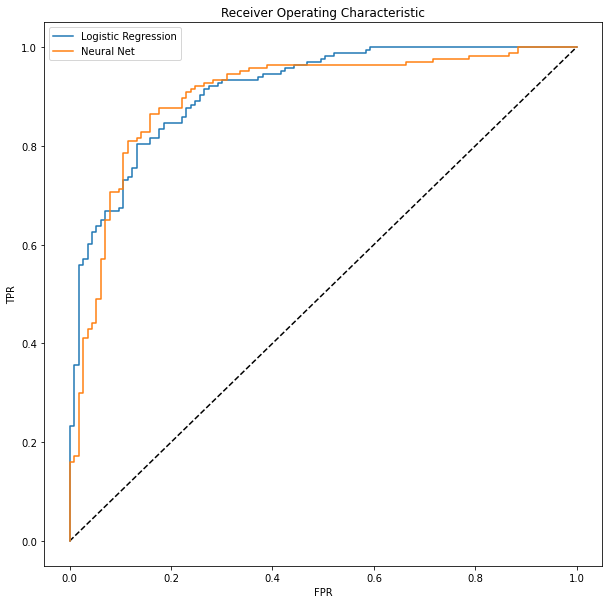

In [284]:
y_pred_prob1 = lr_baseline.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob1)

y_pred_prob4 = nn_baseline.predict_proba(X_test)[:,1]
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_pred_prob4)


plt.figure(figsize = (10, 10))
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr_lr, tpr_lr, label= 'Logistic Regression')
plt.plot(fpr_nn, tpr_nn, label= 'Neural Net')
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()